<a href="https://colab.research.google.com/github/QuantumTCode/FIRST-AI-Crash-Course/blob/master/Lesson%20%232%3A%20Convolutional%20Neural%20Networks/Master_of_AI_Crash_Course_2_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIRST AI Crash Course: Convolutional Neural Networks

## Step 0: Import Necessary Libraries

In [0]:
# Pandas is a data processing library
import pandas as pd

#NumPy is mathematical library
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# and TensorFlow is the backbone of Keras, which is the Neural Network Library we will be using
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical

# Splitting Data
from sklearn.model_selection import train_test_split

import pathlib

Using TensorFlow backend.


## Let's Begin! All comments are where we will be working to fill in the code in real-time, they're supposed to be blank.

A filled-out copy will be posted to the GitHub once we complete it in the workshop.


In [0]:
!wget https://github.com/QuantumTCode/FIRST-AI-Crash-Course/raw/master/Lesson%20%232:%20Convolutional%20Neural%20Networks/fashion_test_X.csv
!wget https://github.com/QuantumTCode/FIRST-AI-Crash-Course/raw/master/Lesson%20%232:%20Convolutional%20Neural%20Networks/fashion-mnist_train.csv.zip && unzip fashion-mnist_train.csv.zip && rm -rf __MACOSX && rm fashion-mnist_train.csv.zip

--2019-04-19 08:55:55--  https://github.com/QuantumTCode/FIRST-AI-Crash-Course/raw/master/Lesson%20%232:%20Convolutional%20Neural%20Networks/fashion_test_X.csv
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/QuantumTCode/FIRST-AI-Crash-Course/master/Lesson%20%232%3A%20Convolutional%20Neural%20Networks/fashion_test_X.csv [following]
--2019-04-19 08:55:56--  https://raw.githubusercontent.com/QuantumTCode/FIRST-AI-Crash-Course/master/Lesson%20%232%3A%20Convolutional%20Neural%20Networks/fashion_test_X.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22156685 (21M) [text/plain]
Savi

In [0]:
train_dataset = pd.read_csv("fashion-mnist_train.csv")

In [0]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [0]:
X = np.array(train_dataset.iloc[:, 1:])
Y = to_categorical(np.array(train_dataset.iloc[:, 0]))

In [0]:
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [0]:
train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
val_X = val_X.reshape(val_X.shape[0], img_rows, img_cols, 1)

In [0]:
train_X = train_X.astype('float32')
val_X = val_X.astype('float32')
train_X /= 255
val_X /= 255

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Ankle boot


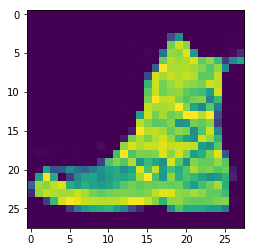

In [0]:
image_index = 111

test_im = train_X[image_index]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
print(class_names[np.argmax(train_Y[image_index])])
plt.show()

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3),
                 input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10,activation='softmax')
  ])

  optimizer = tf.keras.optimizers.SGD(0.01)

  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [0]:
model = build_model()

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Keras callbacks

# Prints a dot for every epoch, just easier to keep track of training
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
    
# Early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [0]:
EPOCHS = 2
batch_size = 256

history = model.fit(train_X, train_Y,
          batch_size=batch_size,
          epochs=EPOCHS,
          verbose=0,
          validation_data=(val_X, val_Y),
          callbacks=[PrintDot()])

Instructions for updating:
Use tf.cast instead.

..

In [0]:
score = model.evaluate(val_X, val_Y, verbose=0)

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,acc,val_loss,val_acc,epoch
0,1.378614,0.624833,0.858919,0.716917,0
1,0.746354,0.754938,0.672771,0.768750,1


In [0]:
#Plot history of model function

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'],
           label='Train acc')
  plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Val acc')
  plt.ylim([0,1])
  plt.legend()
  plt.show()

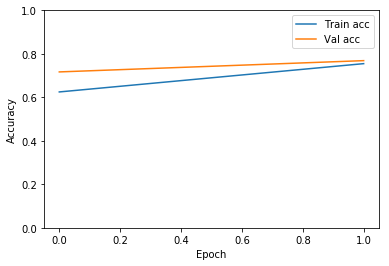

In [0]:
plot_history(history)

In [0]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6727707419395447
Test accuracy: 0.76875


In [0]:
test_X = pd.read_csv("fashion_test_X.csv")
test_X = np.array(test_X)
test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
test_X = test_X.astype('float32')
test_X /= 255

In [0]:
test_predictions = np.argmax(model.predict(test_X), axis=1).astype('float32')
print(test_predictions)

[6. 0. 9. ... 0. 6. 2.]


In [0]:
submission = pd.DataFrame(data=test_predictions, columns=['class'])

In [0]:
submission.to_csv("submission.csv",index_label="index")